In [2]:
from pandas_datareader import data, wb
import pandas as pd
import numpy as np
import yfinance as yf
%matplotlib inline

# Getting the data:

In [3]:

yf.pdr_override()

start= datetime.datetime(2006,1,1)
end = datetime.datetime(2024,1,1)
# Bank of America
BAC = data.get_data_yahoo('BAC', start, end)

# CitiGroup
C = data.get_data_yahoo('C', start, end)
 
# Goldman Sachs
GS = data.get_data_yahoo('GS', start, end)
 
# JPMorgan Chase
JPM = data.get_data_yahoo('JPM', start, end)
 
# Morgan Stanley
MS = data.get_data_yahoo('MS', start, end)
 
# Wells Fargo
WFC = data.get_data_yahoo('WFC', start, end)

[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed
[*********************100%***********************]  1 of 1 completed


# Adding tickers and column names:

In [4]:
tickers = ['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC']
bank_stocks = pd.concat([BAC, C, GS, JPM, MS, WFC],axis=1,keys=tickers)
bank_stocks.columns.names = ['Bank Ticker','Stock Info']

In [14]:
bank_stocks.head()

Bank Ticker        BAC                                                        \
Stock Info        Open       High        Low      Close  Adj Close    Volume   
Date                                                                           
2006-01-03   46.919998  47.180000  46.150002  47.080002  32.956566  16296700   
2006-01-04   47.000000  47.240002  46.450001  46.580002  32.606552  17757900   
2006-01-05   46.580002  46.830002  46.320000  46.639999  32.648556  14970700   
2006-01-06   46.799999  46.910000  46.349998  46.570000  32.599552  12599800   
2006-01-09   46.720001  46.970001  46.360001  46.599998  32.620548  15619400   

Bank Ticker           C                                      ...         MS  \
Stock Info         Open        High         Low       Close  ...        Low   
Date                                                         ...              
2006-01-03   490.000000  493.799988  481.100006  492.899994  ...  56.740002   
2006-01-04   488.600006  491.000000  483.500000  483.799988  ...  58.349998   
2006-01-05   484.399994  487.799988  484.000000  486.200012  ...  58.020000   
2006-01-06   488.799988  489.000000  482.000000  486.200012  ...  58.049999   
2006-01-09   486.000000  487.399994  483.000000  483.899994  ...  58.619999   

Bank Ticker                                       WFC                        \
Stock Info       Close  Adj Close   Volume       Open       High        Low   
Date                                                                          
2006-01-03   58.310001  34.310364  5377000  31.600000  31.975000  31.195000   
2006-01-04   58.349998  34.333889  7977800  31.799999  31.820000  31.365000   
2006-01-05   58.509998  34.428032  5778000  31.500000  31.555000  31.309999   
2006-01-06   58.570000  34.463345  6889800  31.580000  31.775000  31.385000   
2006-01-09   59.189999  34.828148  4144500  31.674999  31.825001  31.555000   

Bank Ticker                                  
Stock Info       Close  Adj Close    Volume  
Date                                         
2006-01-03   31.900000  19.695120  11016400  
2006-01-04   31.530001  19.466679  10870000  
2006-01-05   31.495001  19.445068  10158000  
2006-01-06   31.680000  19.559280   8403800  
2006-01-09   31.674999  19.556204   5619600  

[5 rows x 36 columns]

# Returns of each bank's stock:

In [15]:
returns = pd.DataFrame()
for tick in tickers:
    returns[tick+' Return'] = bank_stocks[tick]['Close'].pct_change()
returns.head()

,BAC Return,C Return,GS Return,JPM Return,MS Return,WFC Return
Date,,,,,,
2006-01-03,NaN,NaN,NaN,NaN,NaN,NaN
2006-01-04,-0.010620,-0.018462,-0.013812,-0.014183,0.000686,-0.011599
2006-01-05,0.001288,0.004961,-0.000393,0.003029,0.002742,-0.001110
2006-01-06,-0.001501,0.000000,0.014169,0.007046,0.001025,0.005874
2006-01-09,0.000644,-0.004731,0.012030,0.016242,0.010586,-0.000158


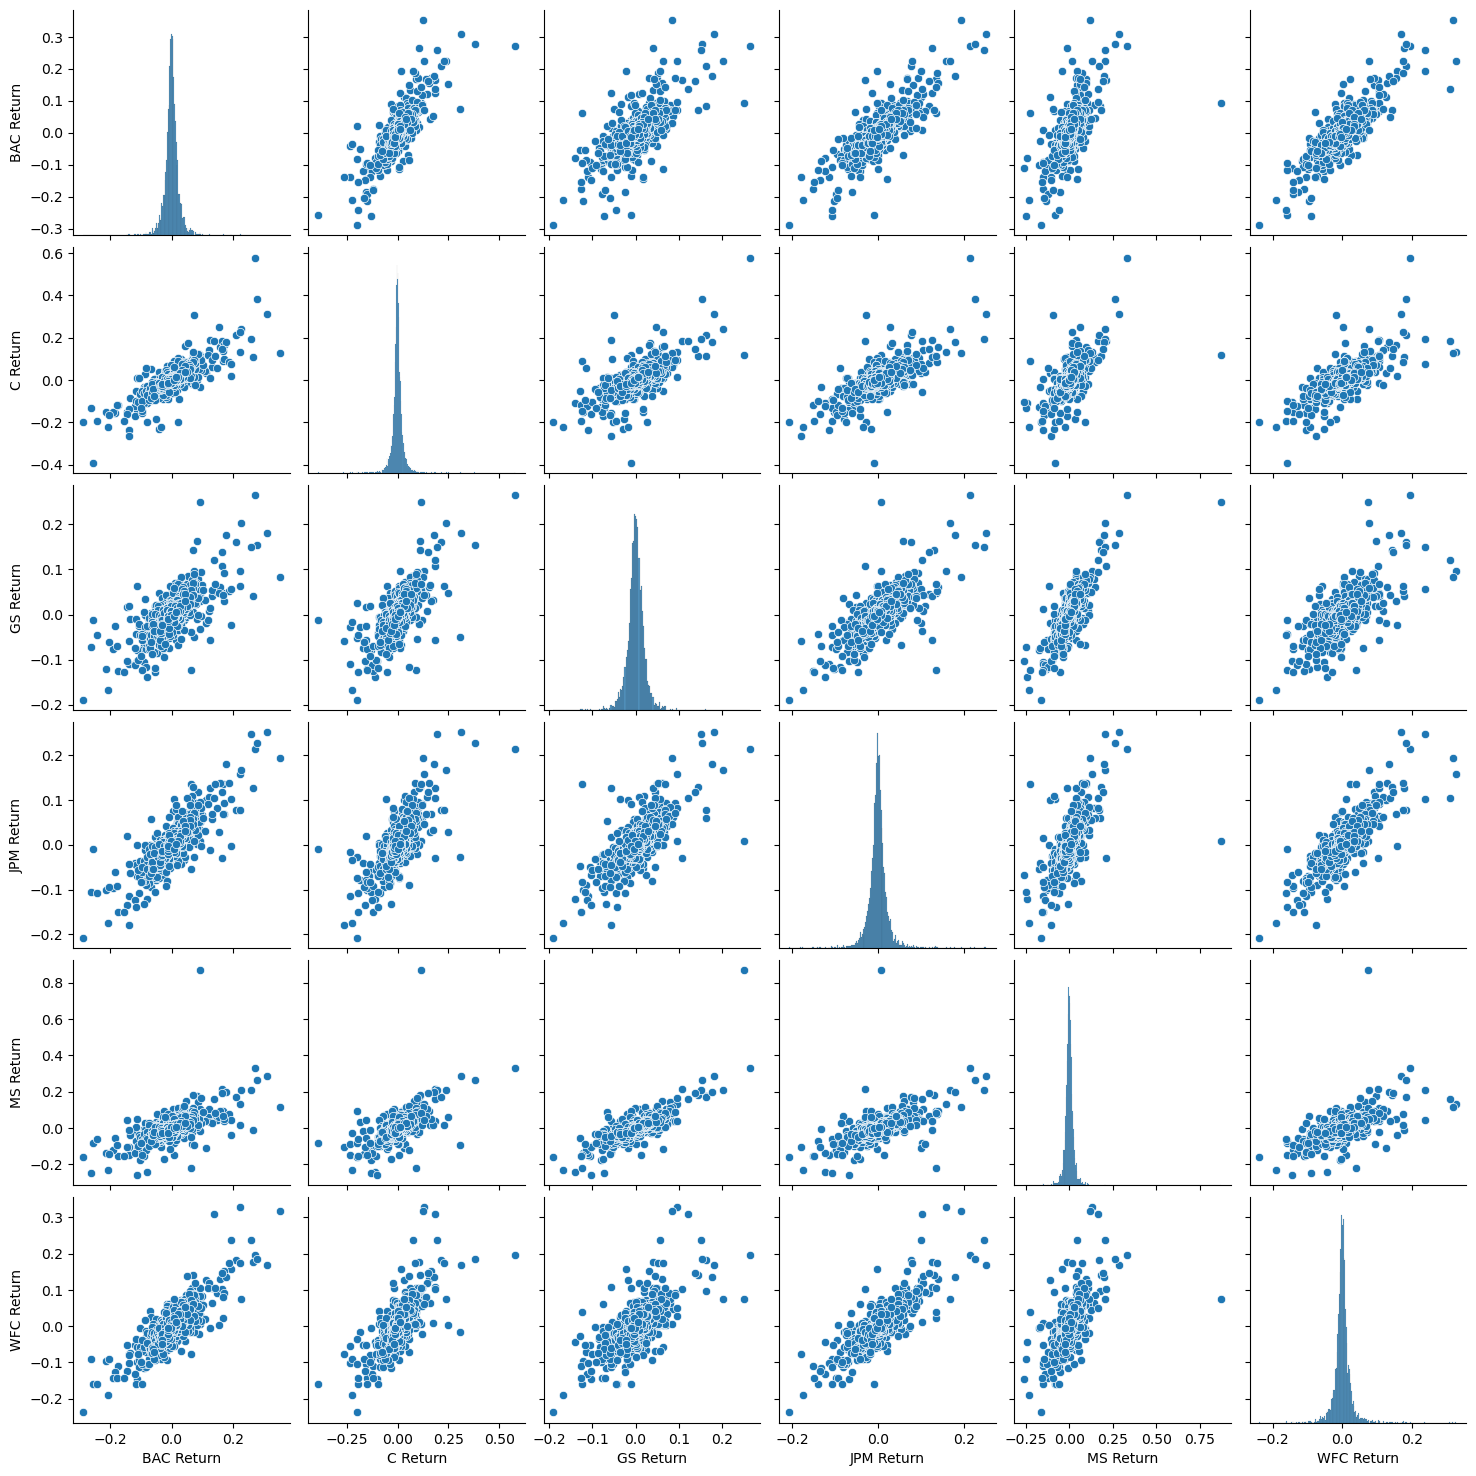

In [16]:
import seaborn as sns
sns.pairplot(returns[1:])

# Standard deviation:

In [17]:
returns.std() # Citigroup riskiest

BAC Return    0.030945
C Return      0.032709
GS Return     0.022945
JPM Return    0.024169
MS Return     0.031723
WFC Return    0.026754
dtype: float64

# 2022 returns for Morgan Stanley:

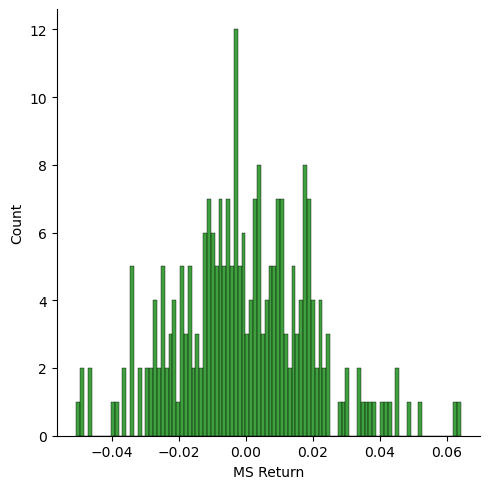

In [18]:
sns.displot(returns.loc['2022-01-01':'2022-12-31']['MS Return'],color='green',bins=100)

# Line plot, showing Close price for each bank for the entire index of time:

In [19]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

# Optional Plotly Method Imports
import plotly
import cufflinks as cf
cf.go_offline()

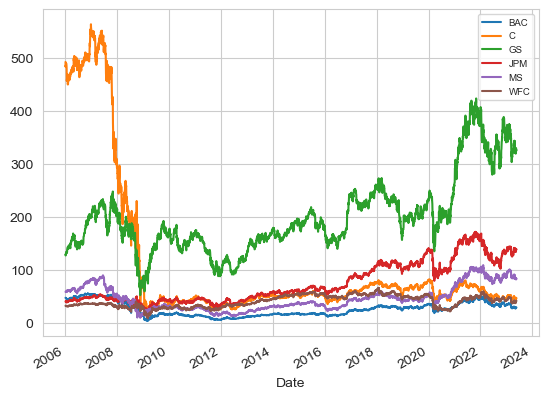

In [20]:
bank_stocks.xs(key='Close',axis=1,level='Stock Info').plot()
plt.legend(fontsize='x-small')

# 30 day average against the Close Price for Bank Of America's stock for the year 2008:

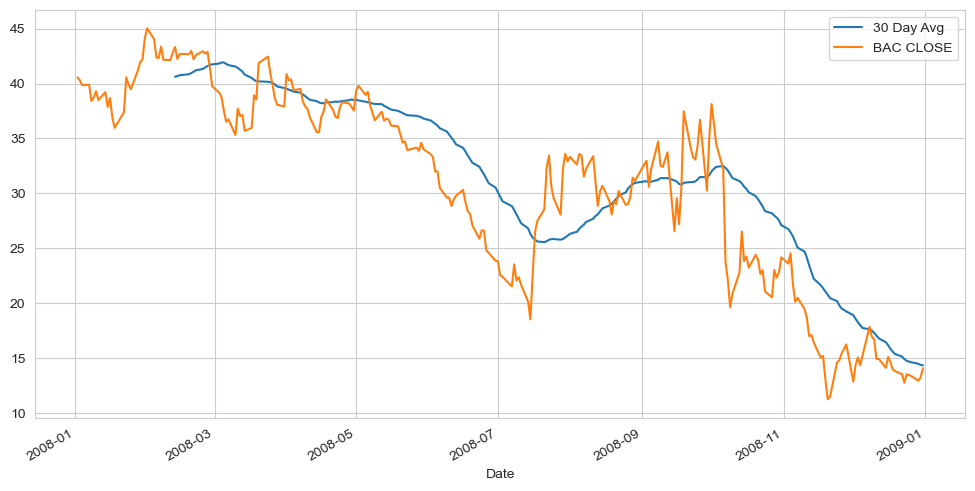

In [21]:
plt.figure(figsize=(12,6))
BAC['Close'].loc['2008-01-01':'2009-01-01'].rolling(window=30).mean().plot(label='30 Day Avg')
BAC['Close'].loc['2008-01-01':'2009-01-01'].plot(label='BAC CLOSE')
plt.legend()

# Heatmap of the correlation between the stocks Close Price:

<Axes: xlabel='Bank Ticker', ylabel='Bank Ticker'>

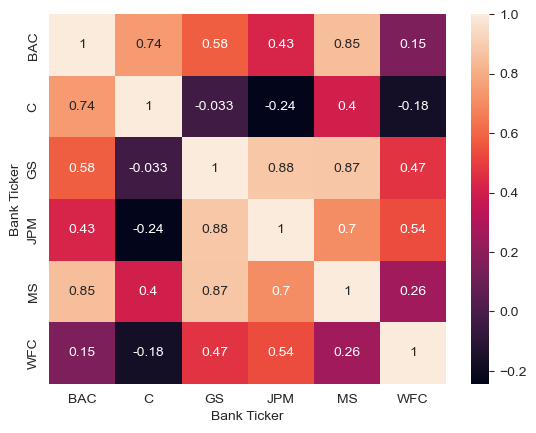

In [22]:
sns.heatmap(bank_stocks.xs(key='Close',axis=1,level='Stock Info').corr(),annot=True)

# Candle plot of Bank of America's stock from Jan 1st 2021 to Jan 1st 2023:

In [26]:
BAC[['Open', 'High', 'Low', 'Close']].loc['2021-06-01':'2023-01-01'].iplot(kind='candle',)